Warning message in lapply(y, as.numeric):
"NAs introduced by coercion"

num.dies,P.bat,P.pv.curt,f.min
9,-2200000,15000000,49.68321
10,-2200000,15000000,49.47824
11,-2200000,15000000,49.50349
12,-2200000,15000000,49.66203
9,-2200000,14750000,49.48286


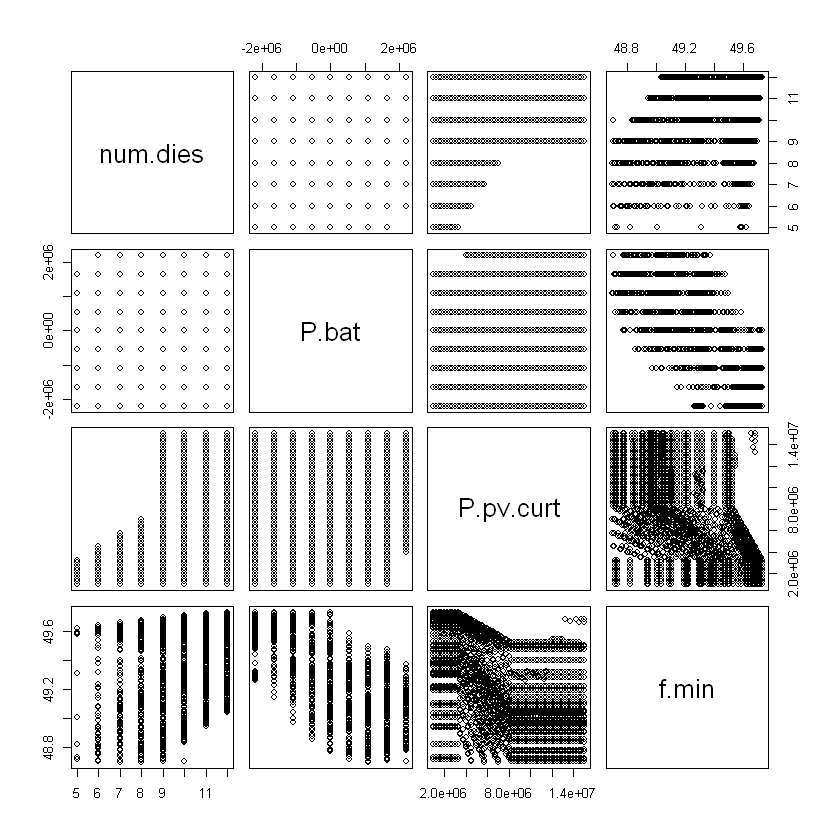

In [5]:
rm(list=ls())

require(R.matlab)

# Reading data 
data <- readMat(con = '../../Data/Generated Data/4 - Frequency/result_sim.mat')
# t() - transpose matrix
X <- t(data.frame(data[[1]],stringsAsFactors = F)) 
X <- as.data.frame(X,row.names = T)
y <- (lapply(X,unlist))
z <- lapply(y,as.numeric)
j <- matrix(unlist(z), ncol = length(z), byrow = F)
cols <- c(2,3,4,6)
k <- j[,cols]
colnames(k) <- names(X[,cols])
k[1:5,]

# comportament de la variable freq vs variables

# windows()
pairs(j[,cols], labels =  names(X[,cols]))
pairs(j[,cols], labels =  colnames(k))

In [6]:
# linear model without transformations

fit <- lm(f.min ~ num.dies + P.bat + P.pv.curt, data=data.frame(k))
summary(fit) # show results



Call:
lm(formula = f.min ~ num.dies + P.bat + P.pv.curt, data = data.frame(k))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3710 -0.1010  0.0056  0.0948  0.5664 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.893e+01  1.499e-02 3264.64   <2e-16 ***
num.dies     6.618e-02  1.655e-03   39.98   <2e-16 ***
P.bat       -1.405e-07  2.061e-09  -68.17   <2e-16 ***
P.pv.curt   -4.812e-08  7.421e-10  -64.84   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1431 on 2566 degrees of freedom
Multiple R-squared:  0.7889,	Adjusted R-squared:  0.7886 
F-statistic:  3196 on 3 and 2566 DF,  p-value: < 2.2e-16


In [3]:
matrix(fit$coefficients)

theta_i = matrix(fit$coefficients)[1];
theta_d = matrix(fit$coefficients)[2];
theta_b = matrix(fit$coefficients)[3];
theta_p = matrix(fit$coefficients)[4];

writeMat(theta_i = theta_i, theta_d = theta_d, theta_b = theta_b, theta_p = theta_p, con="../../Data/Generated Data/4 - Frequency/theta.mat")


4.926810e+01
5.180999e-02
-1.207181e-07
-3.149198e-08


In [4]:
# length(k[,1])

[1] 3621